### http://www.vendian.org/mncharity/dir3/starcolor/

O5 157 180 255
B1 162 185 255
B3 167 188 255
B5 170 191 255
B8 175 195 255
A1 186 204 255
A3 192 209 255
A5 202 216 255
F0 228 232 255
F2 237 238 255
F5 251 248 255
F8 255 249 249
G2 255 245 236
G5 255 244 232
G8 255 241 223
K0 255 235 209
K4 255 215 174
K7 255 198 144
M2 255 190 127
M4 255 187 123
M6 255 187 123

In [79]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.pipeline import Pipeline;
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [95]:
df = pd.read_csv("StarColors.csv", delimiter=" ", names=["Name", "R", "G", "B"]);
df["R"] = df["R"] / 255.0;
df["G"] = df["G"] / 255.0;
df["B"] = df["B"] / 255.0;

display(df.head())



,Name,R,G,B
0,O5,0.615686,0.705882,1.0
1,B1,0.635294,0.725490,1.0
2,B3,0.654902,0.737255,1.0
3,B5,0.666667,0.749020,1.0
4,B8,0.686275,0.764706,1.0


In [96]:
print(len(df.index))
print(df["R"].tolist())

21
[0.615686274509804, 0.6352941176470588, 0.6549019607843137, 0.6666666666666666, 0.6862745098039216, 0.7294117647058823, 0.7529411764705882, 0.792156862745098, 0.8941176470588236, 0.9294117647058824, 0.984313725490196, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[-0.34970836  3.01217486 -7.03979628  4.01061921]
1.0044296822813448
[ 0.35529946  3.21427637 -8.17669968  4.63094998]
0.7105430630750322
[ -0.88069571  16.68565124 -44.11776039  44.98967698 -16.16596219]
0.47835976470247865


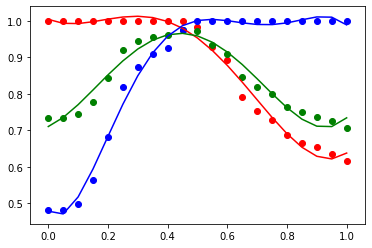

In [97]:
X = np.flip(np.linspace(0, 1, len(df.index))); #flip so most massive is most blue
A = np.vstack([X, np.ones(len(X))]).T
X = X.reshape(-1,1)


model = Pipeline([('poly', PolynomialFeatures(degree=4, include_bias=False)), ('linear', LinearRegression())]);
model.fit(X, df["R"].tolist());
print(model.named_steps['linear'].coef_)
print(model.named_steps['linear'].intercept_)
yR = model.predict(X);
# mR, cR = np.linalg.lstsq(A, df["R"].tolist(), rcond=None)[0]
# yR = X*mR + cR;
plt.plot(X, yR, color='r');

model = Pipeline([('poly', PolynomialFeatures(degree=4, include_bias=False)), ('linear', LinearRegression())]);
model.fit(X, df["G"].tolist());
print(model.named_steps['linear'].coef_)
print(model.named_steps['linear'].intercept_)
yG = model.predict(X);
# mG, cG = np.linalg.lstsq(A, df["G"].tolist(), rcond=None)[0]
# yG = X*mG + cG;
plt.plot(X, yG,color='g');

model = Pipeline([('poly', PolynomialFeatures(degree=5, include_bias=False)), ('linear', LinearRegression())]);
model.fit(X, df["B"].tolist());
print(model.named_steps['linear'].coef_)
print(model.named_steps['linear'].intercept_)
yB = model.predict(X);
# mB, cB = np.linalg.lstsq(A, df["B"].tolist(), rcond=None)[0]
# yB = X*mB + cB;
plt.plot(X, yB,color='b');

plt.scatter(X, df["R"], color='r')
plt.scatter(X, df["G"], color='g')
plt.scatter(X, df["B"], color='b')




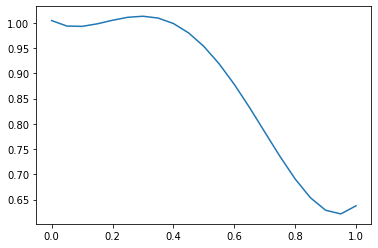

In [98]:
yTest = 1.0044296822813448 + -0.34970836*X + 3.01217486*(X**2) -7.03979628*(X**3) + 4.01061921*(X**4)

plt.plot(X, yTest)